# **Finding Duplicates Lab**

## Introduction
Data wrangling is a critical step in preparing datasets for analysis, and handling duplicates plays a key role in ensuring data accuracy. In this lab, you will focus on identifying and removing duplicate entries from your dataset. 

## Objectives
In this lab, you will perform the following:
1. Identify duplicate rows in the dataset and analyze their characteristics.
2. Visualize the distribution of duplicates based on key attributes.
3. Remove duplicate values strategically based on specific criteria.
4. Outline the process of verifying and documenting duplicate removal.

## Hands on Lab


Install the needed library


In [2]:
%pip install pandas
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Import pandas module


In [3]:
import pandas as pd

Import matplotlib


In [4]:
import matplotlib.pyplot as plt

## **Load the dataset into a dataframe**


<h2>Read Data</h2>
<p>
We utilize the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


In [5]:
# Load the dataset directly from the URL
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/VYPrOu0Vs3I0hKLLjiPGrA/survey-data-with-duplicate.csv"
df = pd.read_csv(file_path)

# Display the first few rows
print(df.head())

   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

Load the data into a pandas dataframe:



Note: If you are working on a local Jupyter environment, you can use the URL directly in the pandas.read_csv() function as shown below:



In [ ]:
# df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv")

## Identify and Analyze Duplicates


### Task 1: Identify Duplicate Rows
1. Count the number of duplicate rows in the dataset.
3. Display the first few duplicate rows to understand their structure.


In [6]:
## Write your code here
# Count the number of duplicate rows
num_duplicates = df.duplicated().sum()
print("\nNumber of duplicate rows:", num_duplicates)

# Display the first few duplicate rows
duplicate_rows = df[df.duplicated()]
print("\nFirst few duplicate rows:")
print(duplicate_rows.head())


Number of duplicate rows: 20

First few duplicate rows:
       ResponseId                      MainBranch                 Age  \
65437           1  I am a developer by profession  Under 18 years old   
65438           2  I am a developer by profession     35-44 years old   
65439           3  I am a developer by profession     45-54 years old   
65440           4           I am learning to code     18-24 years old   
65441           5  I am a developer by profession     18-24 years old   

                Employment RemoteWork   Check  \
65437  Employed, full-time     Remote  Apples   
65438  Employed, full-time     Remote  Apples   
65439  Employed, full-time     Remote  Apples   
65440   Student, full-time        NaN  Apples   
65441   Student, full-time        NaN  Apples   

                                        CodingActivities  \
65437                                              Hobby   
65438  Hobby;Contribute to open-source projects;Other...   
65439  Hobby;Contribute to op

### Task 2: Analyze Characteristics of Duplicates
1. Identify duplicate rows based on selected columns such as MainBranch, Employment, and RemoteWork. Analyse which columns frequently contain identical values within these duplicate rows.
2. Analyse the characteristics of rows that are duplicates based on a subset of columns, such as MainBranch, Employment, and RemoteWork. Determine which columns frequently have identical values across these rows.
   


In [7]:
## Write your code here
# Step 1: Find duplicates based only on selected subset of columns
subset_cols = ['MainBranch', 'Employment', 'RemoteWork']
duplicate_subset = df[df.duplicated(subset=subset_cols, keep=False)]

# Step 2: Display sample of those duplicate rows
print("Sample of duplicates based on MainBranch, Employment, and RemoteWork:")
print(duplicate_subset.head())

# Step 3: Analyze which columns have identical values across these duplicate rows
# We'll group by the subset columns and then check for column-wise similarity within each group

from collections import Counter

# Create a counter for each column to see how often values match across duplicates
match_counts = Counter()

# Group the duplicates by the subset columns
grouped = duplicate_subset.groupby(subset_cols)

# For each group, check how many columns have the same value across all rows
for _, group in grouped:
    if len(group) < 2:
        continue  # Skip groups with only one row
    for col in df.columns:
        if col in subset_cols:
            continue
        if group[col].nunique(dropna=False) == 1:  # All values in this column are the same
            match_counts[col] += 1

# Sort and display the most frequently matched columns
sorted_matches = dict(sorted(match_counts.items(), key=lambda item: item[1], reverse=True))

print("\nColumns that most frequently match within duplicate groups:")
for col, count in sorted_matches.items():
    print(f"{col}: {count} groups")

Sample of duplicates based on MainBranch, Employment, and RemoteWork:
   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                   

### Task 3: Visualize Duplicates Distribution
1. Create visualizations to show the distribution of duplicates across different categories.
2. Use bar charts or pie charts to represent the distribution of duplicates by Country and Employment.


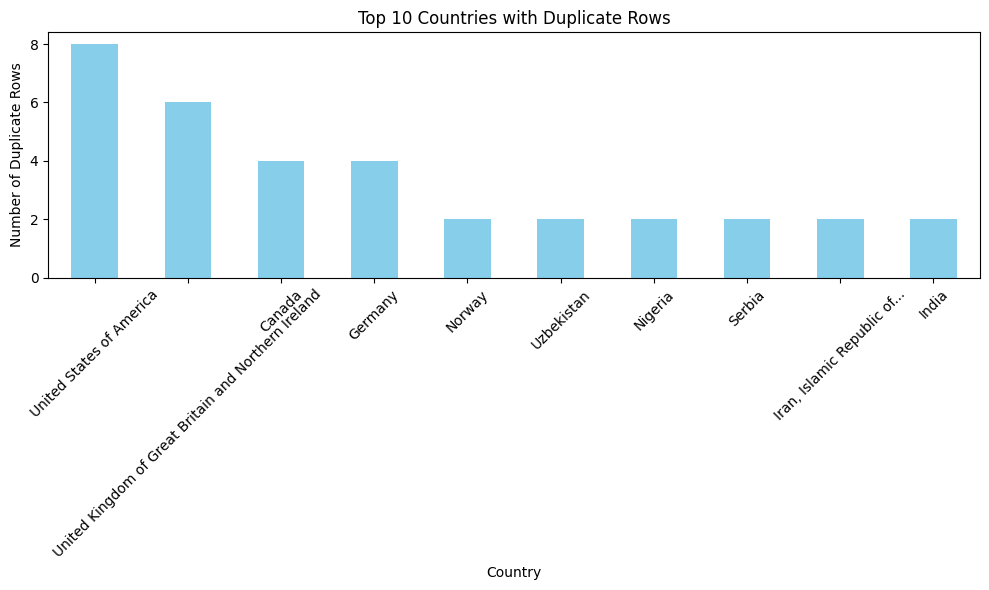

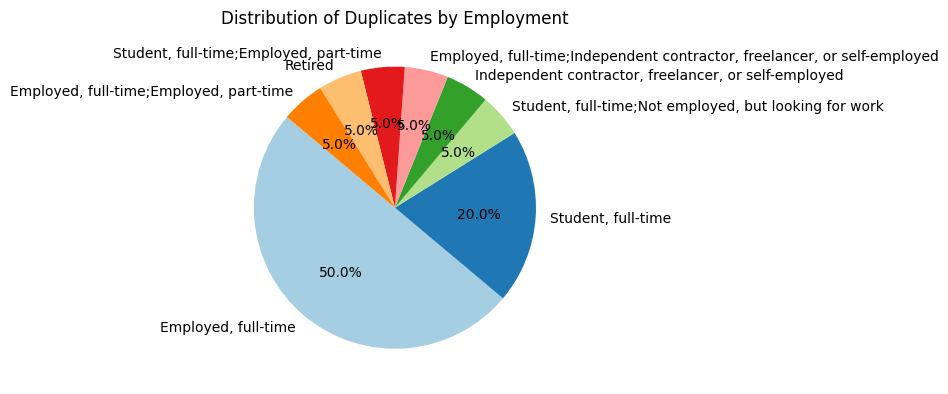

In [8]:
## Write your code here
# Identify duplicate rows
duplicates = df[df.duplicated(keep=False)]

# --- Distribution by Country (Bar Chart) ---
country_counts = duplicates['Country'].value_counts().head(10)  # Top 10 countries

plt.figure(figsize=(10, 6))
country_counts.plot(kind='bar', color='skyblue')
plt.title('Top 10 Countries with Duplicate Rows')
plt.xlabel('Country')
plt.ylabel('Number of Duplicate Rows')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# --- Distribution by Employment (Pie Chart) ---
employment_counts = duplicates['Employment'].value_counts()

plt.figure(figsize=(8, 8))
employment_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Distribution of Duplicates by Employment')
plt.ylabel('')  # Hide y-axis label for pie chart
plt.tight_layout()
plt.show()

### Task 4: Strategic Removal of Duplicates
1. Decide which columns are critical for defining uniqueness in the dataset.
2. Remove duplicates based on a subset of columns if complete row duplication is not a good criterion.


In [9]:
## Write your code here
# Define key columns to check for duplicate logic
key_columns = ['MainBranch', 'Employment', 'RemoteWork', 'Country', 'EdLevel', 'Age']

# Count how many duplicates exist based on the selected columns
subset_duplicates = df.duplicated(subset=key_columns, keep=False)
print("Number of duplicate rows based on key columns:", subset_duplicates.sum())

# Remove duplicates, keeping the first occurrence
df_cleaned = df.drop_duplicates(subset=key_columns, keep='first')

print("Original dataset shape:", df.shape)
print("Cleaned dataset shape:", df_cleaned.shape)

Number of duplicate rows based on key columns: 51928
Original dataset shape: (65457, 114)
Cleaned dataset shape: (20051, 114)


## Verify and Document Duplicate Removal Process


### Task 5: Documentation
1. Document the process of identifying and removing duplicates.


2. Explain the reasoning behind selecting specific columns for identifying and removing duplicates.


### Summary and Next Steps
**In this lab, you focused on identifying and analyzing duplicate rows within the dataset.**

- You employed various techniques to explore the nature of duplicates and applied strategic methods for their removal.
- For additional analysis, consider investigating the impact of duplicates on specific analyses and how their removal affects the results.
- This version of the lab is more focused on duplicate analysis and handling, providing a structured approach to deal with duplicates in a dataset effectively.


Copyright © IBM Corporation. All rights reserved.